<a href="https://colab.research.google.com/github/mustafabozkaya/AI-ML-DL-DS_Projects_Portfolio/blob/master/Car-price-prediction-project/all_exercise_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Machine Learning for Regression


In [116]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [117]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [118]:
!wget $data

--2023-12-18 11:51:46--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.03s   

2023-12-18 11:51:47 (48.5 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [119]:
df = pd.read_csv('data.csv')

In [120]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [121]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [122]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [123]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [124]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory data analysis

In [125]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [126]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Distribution of price

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

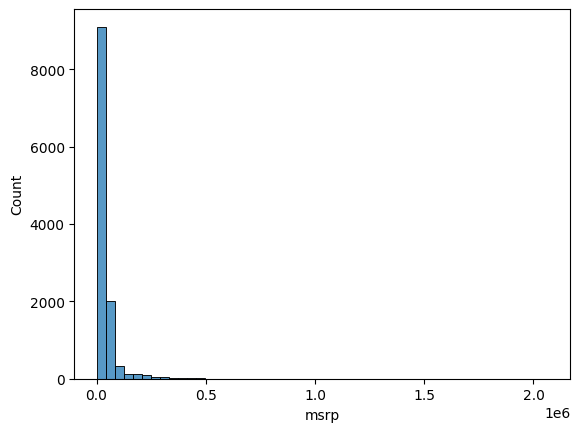

In [128]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

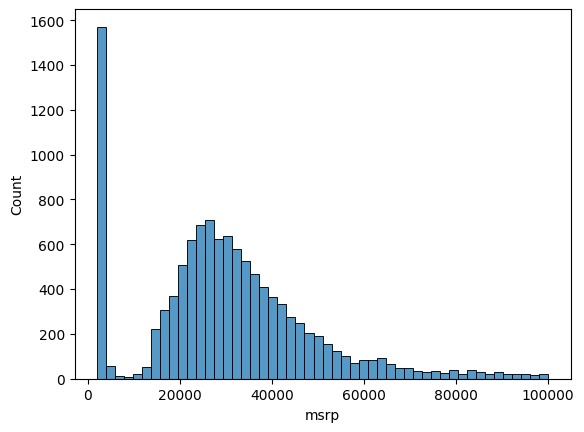

In [129]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [130]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [131]:
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51292546])

In [132]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

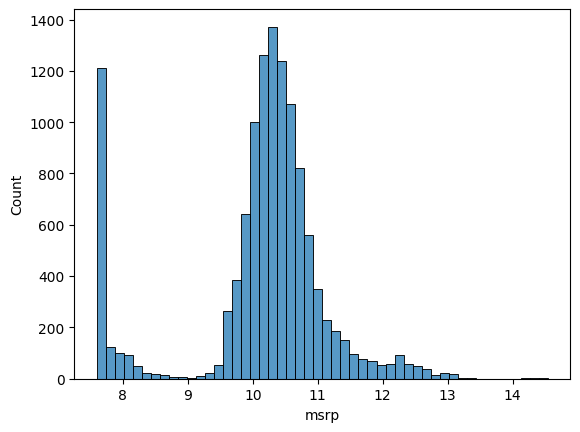

In [133]:

sns.histplot(price_logs, bins=50)

Missing values

In [134]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

Let's draw it

In [135]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [136]:
n

11914

In [137]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [138]:
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [139]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [140]:
idx = np.arange(n)

In [141]:
np.random.seed(2)
np.random.shuffle(idx)

In [142]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [143]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [144]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [145]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [146]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [147]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [148]:
len(y_train)

7150

## 2.5 Linear regression

draw

In [149]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [150]:
xi = [453, 11, 86]
w0 = 0
w = [1,1,1]

In [151]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [152]:
linear_regression(xi)

550

In [153]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [154]:
linear_regression(xi)

12.312

In [155]:
? np.expm1

In [156]:
np.expm1(12.312)

222347.2221101062

In [157]:
np.log1p(222347.2221101062)

12.312

## 2.6 Linear regression vector form

In [158]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [159]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [160]:
w_new = [w0] + w

In [161]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [162]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [163]:
linear_regression(xi)

12.312

In [164]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [165]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [166]:
def linear_regression(X):
    return X.dot(w_new)

In [167]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [168]:
def train_linear_regression(X, y):
    pass

In [169]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [170]:
ones = np.ones(X.shape[0]) #For bias coefficient
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [171]:
X_one = np.column_stack([ones, X])
X_one #add each record for constant bias coef.

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [172]:
X_one.shape

(9, 4)

In [173]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [174]:
X_one.T.shape

(4, 9)

In [175]:
XTX = X_one.T.dot(X_one)
XTX #gram matrix

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [176]:
XTX.shape

(4, 4)

In [177]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [178]:
XTX_inv.shape

(4, 4)

In [179]:
#https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/07-linear-regression-training.md
w_full = XTX_inv.dot(X_one.T).dot(y)
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [180]:
w0 = w_full[0]
w = w_full[1:]

In [181]:
w0, w

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [182]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # Coefficient for bias
    X = np.column_stack([ones, X]) #adding horizontal bias coefficient vector

    XTX = X.T.dot(X) # In order to get the inverse, we will get a square matrix, and this matrix is called a gram matrix
    XTX_inv = np.linalg.inv(XTX) #We got the inverse of the gram matrix

    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [183]:
train_linear_regression(X, y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In [184]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [185]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [186]:
w0

7.927257388069986

In [187]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

In [188]:
y_pred, y_pred.shape

(array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
        11.9778914 ,  9.99863111]),
 (7150,))

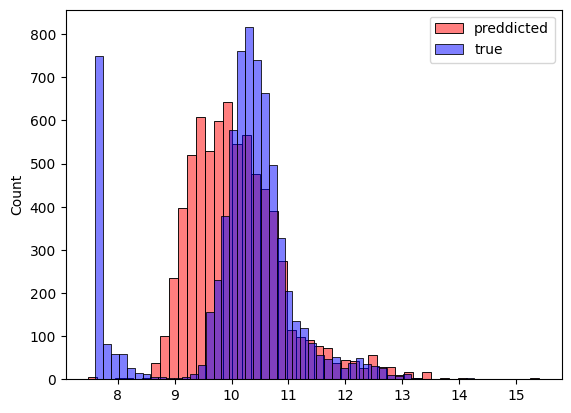

In [189]:
sns.histplot(y_pred,label='preddicted', color='red', alpha=0.5, bins=50)
sns.histplot(y_train,label='true', color='blue', alpha=0.5, bins=50)
plt.legend()

## 2.9 RMSE

In [190]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [191]:
rmse(y_train, y_pred)

0.7554192603920132

## 2.10 Validating the model

In [192]:
def prepare1_X(df):

    df_num = df[base].fillna(df[base].mean())
    X = df_num.values
    return X

In [193]:
X_train = prepare1_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7502502346381938

Text(0.5, 1.0, '  valid rmse :0.7502502346381938 ')

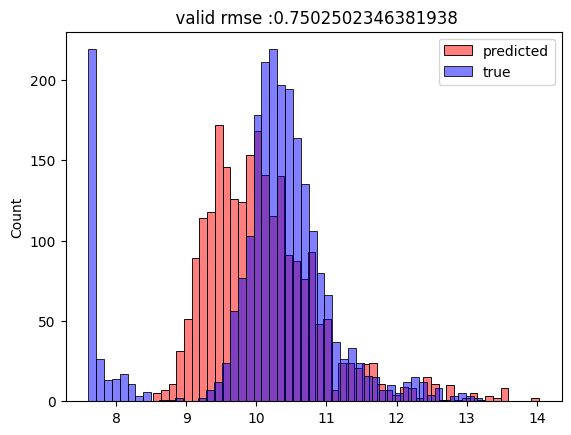

In [194]:
sns.histplot(y_pred,label='predicted', color='red', alpha=0.5, bins=50)
sns.histplot(y_val,label='true', color='blue', alpha=0.5, bins=50)
plt.legend()
plt.title(f"  valid rmse :{rmse(y_val, y_pred) } ")

## 2.11 Simple feature engineering

In [195]:
def prepare2_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age']

    df_num = df[features]
    df_num = df[features].fillna(df[features].mean())
    X = df_num.values

    return X

In [196]:
X_train = prepare2_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare2_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5070033906013028

Text(0.5, 1.0, '  valid rmse :0.5070033906013028 ')

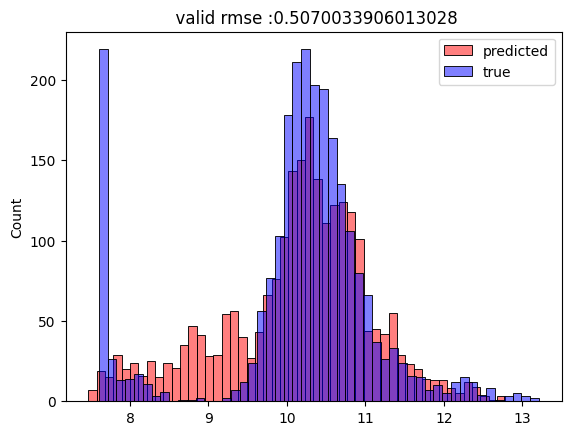

In [204]:
sns.histplot(y_pred,label='predicted', color='red', alpha=0.5, bins=50)
sns.histplot(y_val,label='true', color='blue', alpha=0.5, bins=50)
plt.legend()
plt.title(f"  valid rmse :{rmse(y_val, y_pred) } ")

In [229]:
df.number_of_doors.value_counts()

4.0    8353
2.0    3160
3.0     395
Name: number_of_doors, dtype: int64

In [231]:
df.number_of_doors.isnull().sum(),df.number_of_doors.unique()

(6, array([ 2.,  4.,  3., nan]))

In [205]:

df = df.copy()

df['age'] = 2017 - df['year']
features = base + ['age']
# one hot encoding for number of door
for v in [2, 3, 4]:
   df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
   features.append('num_doors_%d' % v)

In [213]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp', 'age', 'num_doors_2',
       'num_doors_3', 'num_doors_4'],
      dtype='object')

In [243]:
def prepare3_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    df_num = df[features]
    df_num = df[features].fillna(df[features].mean())
    X = df_num.values

    return X

In [244]:
X_train = prepare3_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare3_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5059202395654524

Text(0.5, 1.0, '  valid rmse :0.5059202395654524 ')

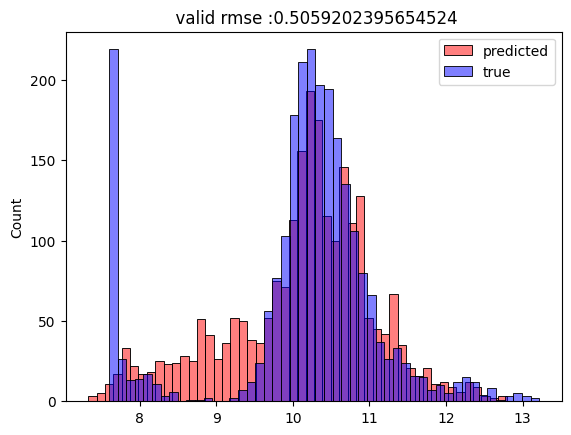

In [245]:
sns.histplot(y_pred,label='predicted', color='red', alpha=0.5, bins=50)
sns.histplot(y_val,label='true', color='blue', alpha=0.5, bins=50)
plt.legend()
plt.title(f"  valid rmse :{rmse(y_val, y_pred) } ")

## 2.12 Categorical variables

In [200]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [232]:
df.make.value_counts().head(10)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
gmc            515
honda          449
mazda          423
cadillac       397
Name: make, dtype: int64

In [253]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head(10).index)

In [247]:
categorical

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [254]:
def preparec_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    # one hot encoding for top 10 categories
    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    #print(df.columns)
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values

    return X

In [237]:
preparec_X(df_train)

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2',
       'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford',
       'make_volkswagen', 'make_toyota', 'make_dodge', 'make_nissan',
       'make_gmc', 'make_mazda', 'make_cadillac', 'make_honda',
       'model_silverado_1500', 'model_tundra', 'model_f-150',
       'model_sierra_1500', 'model_tacoma', 'model_beetle_convertible',
       'model_accord', 'model_gti', 'model_frontier', 'model_beetle',
       'engine_fuel_type_regular_unleaded',
       'engine_fuel_type_premium_unleaded_(required)',
       'engine_fuel_type_premium_unleaded_(recommended)',
       'engine_fuel_type_flex-fuel_(unleaded/e85)', 'engine_fuel_type_diesel',
       'engine_fuel_type_electric',
       'engine_fuel_type_flex-fuel_(premium_

0

In [255]:
X_train = preparec_X(df_train)
X_train.shape

(7150, 65)

In [256]:
w0, w = train_linear_regression(X_train, y_train)

X_val = preparec_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

226.97717827330956

In [259]:
w0

980876690328452.9

Text(0.5, 1.0, '  valid rmse :226.97717827330956 ')

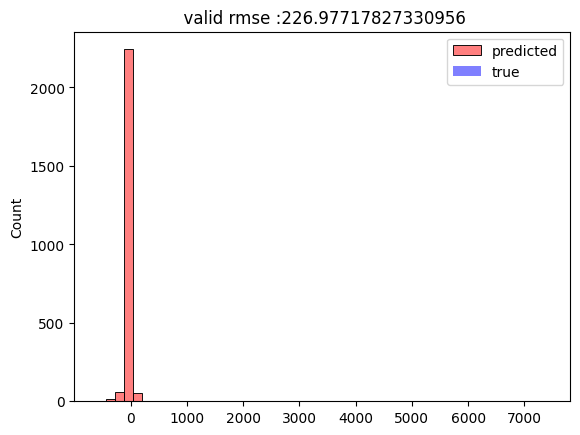

In [258]:
sns.histplot(y_pred,label='predicted', color='red', alpha=0.5, bins=50)
sns.histplot(y_val,label='true', color='blue', alpha=0.5, bins=50)
plt.legend()
plt.title(f"  valid rmse :{rmse(y_val, y_pred) } ")

## 2.13 Regularization

In [264]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00001],
]

X = np.array(X)
X

array([[4.     , 4.     , 4.     ],
       [3.     , 5.     , 5.     ],
       [5.     , 1.     , 1.     ],
       [5.     , 4.     , 4.     ],
       [7.     , 5.     , 5.     ],
       [4.     , 5.     , 5.00001]])

In [261]:
y= [1, 2, 3, 1, 2, 3]

In [265]:
XTX = X.T.dot(X)
XTX

array([[140.     , 111.     , 111.00004],
       [111.     , 108.     , 108.00005],
       [111.00004, 108.00005, 108.0001 ]])

In [266]:
XTX_inv = np.linalg.inv(XTX)

In [267]:
XTX_inv

array([[ 4.12734158e-02, -6.11735479e+03,  6.11730954e+03],
       [-6.11735479e+03,  1.39206347e+10, -1.39206220e+10],
       [ 6.11730954e+03, -1.39206220e+10,  1.39206093e+10]])

In [268]:
XTX_inv.dot(X.T).dot(y)

array([ 4.13182969e-01, -1.74517471e+05,  1.74517392e+05])

In [275]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [270]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [273]:
np.eye(XTX.shape[0])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [281]:
XTX = XTX + 0.1 * np.eye(XTX.shape[0])
XTX

array([[1.11     , 2.       , 2.       ],
       [2.       , 1.11     , 1.0000001],
       [2.       , 1.0000001, 1.11     ]])

In [282]:
np.linalg.inv(XTX)

array([[-0.37292991,  0.35348805,  0.35348805],
       [ 0.35348805,  4.44736574, -4.64355161],
       [ 0.35348805, -4.64355161,  4.44736574]])

In [277]:
def train_linear_regression_r(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [295]:
X_train = preparec_X(df_train)
w0, w = train_linear_regression_r(X_train, y_train, r=0.001)

X_val = preparec_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4419971220233104

Text(0.5, 1.0, ' r : 0.001 valid rmse :0.4419971220233104 ')

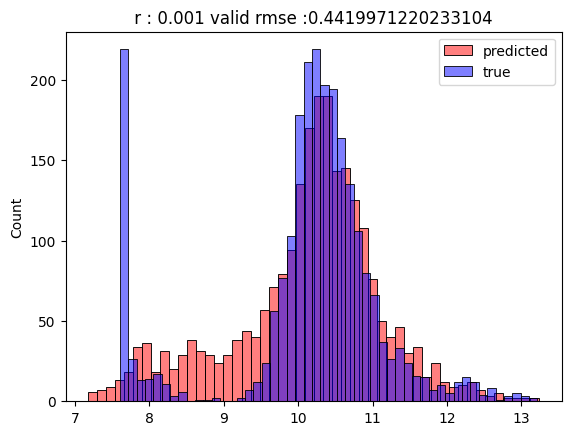

In [297]:
sns.histplot(y_pred,label='predicted', color='red', alpha=0.5, bins=50)
sns.histplot(y_val,label='true', color='blue', alpha=0.5, bins=50)
plt.legend()
plt.title(f" r : 0.001 valid rmse :{rmse(y_val, y_pred) } ")

## 2.14 Tuning the model

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

In [ ]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

## 2.15 Using the model

In [ ]:
df_full_train = pd.concat([df_train, df_val])

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
X_full_train = prepare_X(df_full_train)

In [ ]:
X_full_train

In [ ]:
y_full_train = np.concatenate([y_train, y_val])

In [ ]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [ ]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

In [ ]:
car = df_test.iloc[20].to_dict()
car

In [ ]:
df_small = pd.DataFrame([car])
df_small

In [ ]:
X_small = prepare_X(df_small)

In [ ]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

In [ ]:
np.expm1(y_pred)

In [ ]:
np.expm1(y_test[20])

## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability